# Q1). Consider only the below columns and prepare a prediction model for predicting Price of Toyota Corolla.

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
%matplotlib inline

In [450]:
toyota=pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/5 Multi Linear Regression/ToyotaCorolla - Copy.csv')
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [451]:
toyota = toyota.rename({'Age_08_04': 'Age'}, axis=1)
toyota = toyota.rename({'Quarterly_Tax': 'Tax'}, axis=1)
toyota = toyota.rename({'cc': 'CC'}, axis=1)

In [452]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [453]:
# Check for missing values
toyota.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [454]:
toyota

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Correlation Matrix

In [455]:
# Correlation Matrix
toyota.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histogram

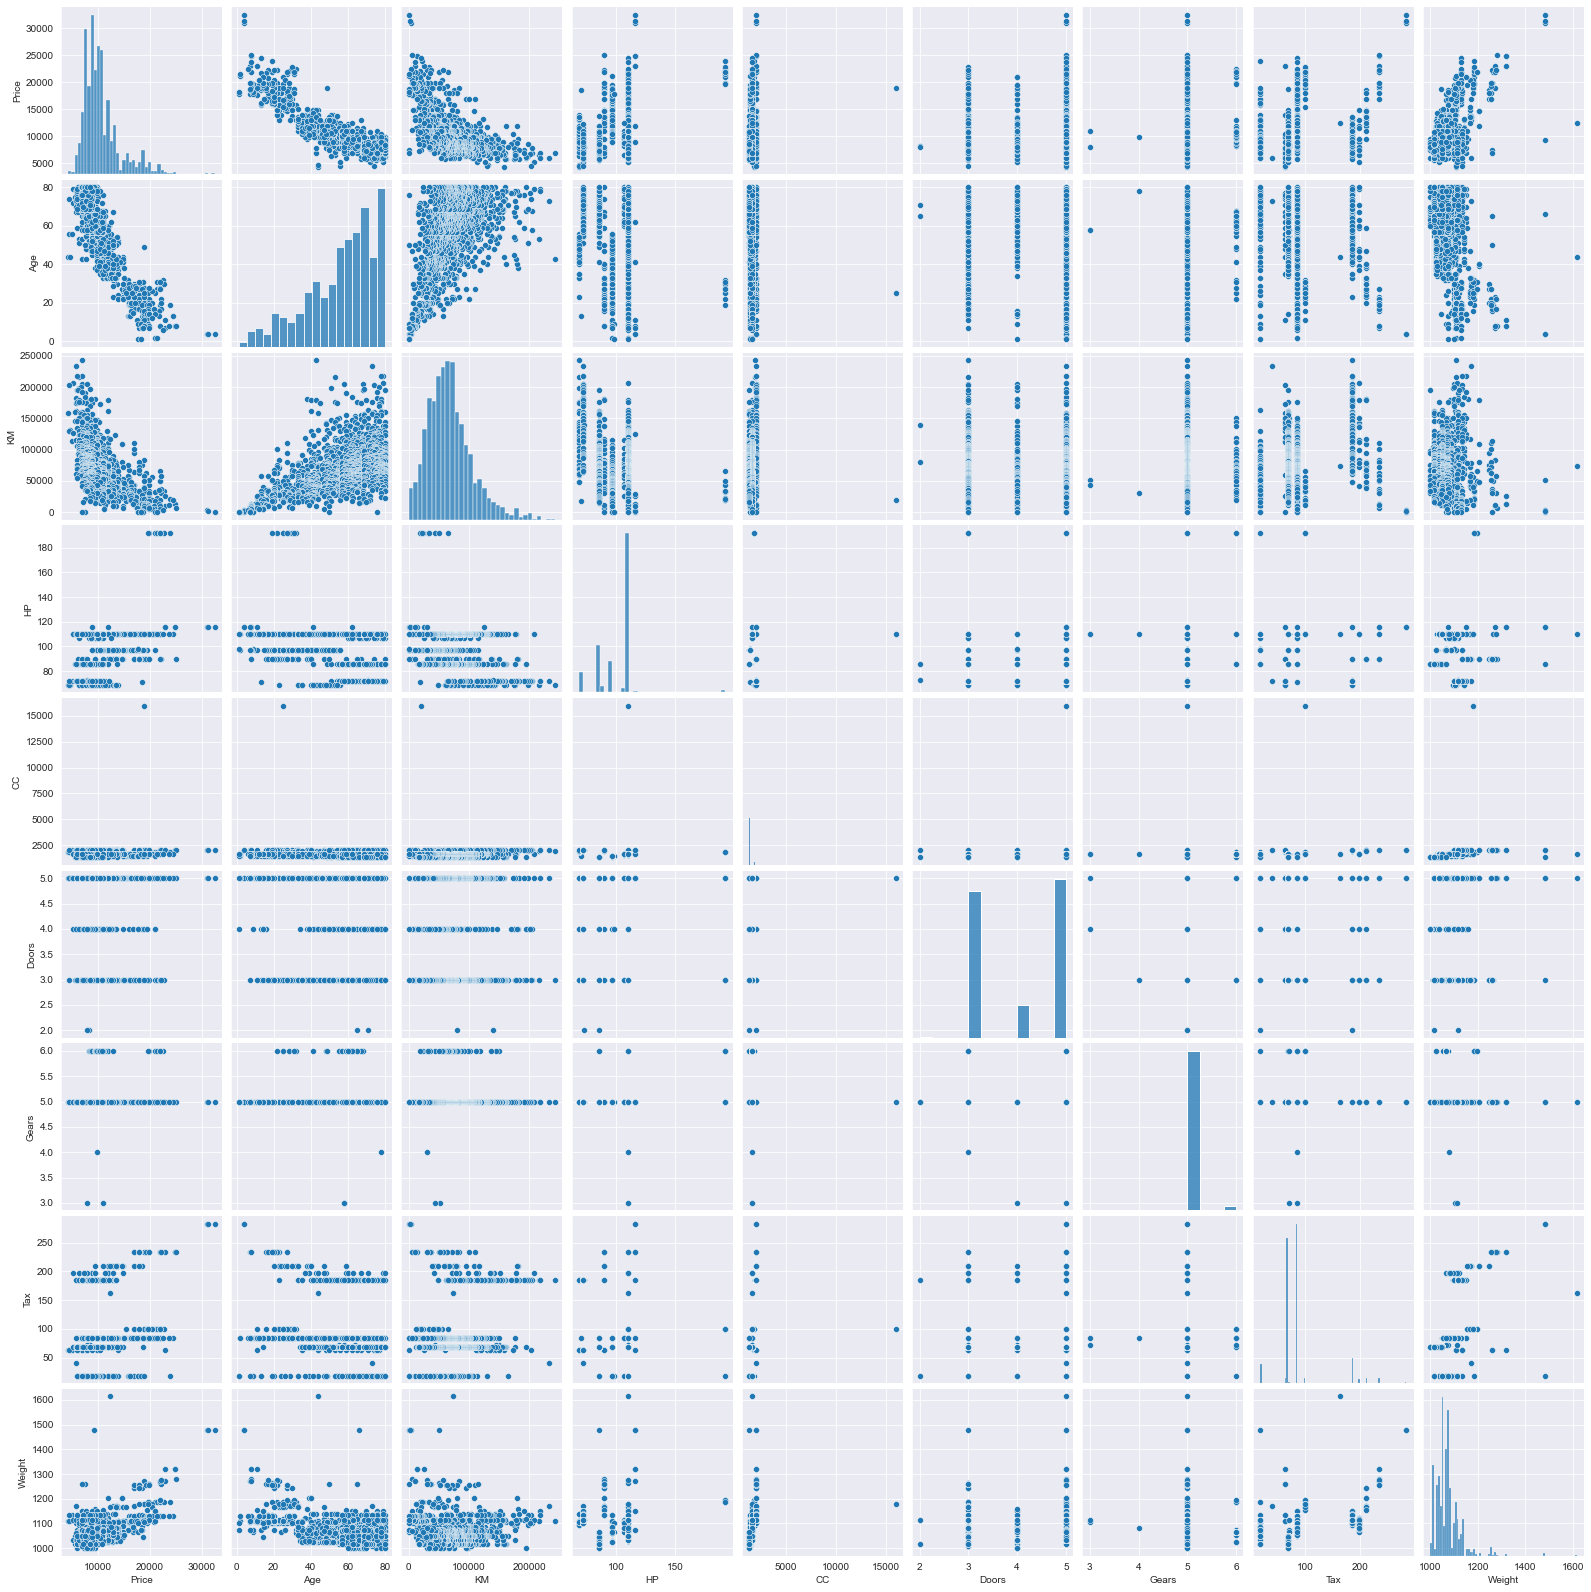

In [456]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style = 'darkgrid')
sns.pairplot(toyota)

# Preparing a model

# Model 1: Statsmodel

In [457]:
# Build model
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight', data=toyota).fit()

In [458]:
#Coefficients
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
Tax             3.949081
Weight         16.958632
dtype: float64

In [459]:
# t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
Doors        -0.040410
Gears         3.016007
Tax           3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Tax           2.619148e-03
Weight        2.048576e-52
dtype: float64


In [460]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regression Models

In [461]:
ml_c=smf.ols('Price~CC', data=toyota).fit()
print(ml_c.tvalues, '\n', ml_c.pvalues)

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [462]:
ml_d= smf.ols('Price~Doors', data=toyota).fit()
print(ml_d.tvalues, '\n', ml_d.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [463]:
ml_cd= smf.ols('Price~CC+Doors', data=toyota).fit()
print(ml_cd.tvalues,'\n', ml_cd.pvalues)

Intercept    12.620704
CC            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Calulating VIF

In [464]:
rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+Tax+Weight', data=toyota).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+Tax+Weight', data=toyota).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+Tax+Weight', data=toyota).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+Tax+Weight', data=toyota).fit().rsquared
vif_CC = 1/(1-rsq_CC)

rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Gears+Tax+Weight', data=toyota).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+Tax+Weight', data=toyota).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Tax = smf.ols('Tax~Age+KM+HP+CC+Doors+Gears+Weight', data=toyota).fit().rsquared
vif_Tax = 1/(1-rsq_Tax)

rsq_Weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Tax', data=toyota).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [465]:
# Storing VIF values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','Tax','Weight'],
     'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_Tax,vif_Weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Tax,2.311431
7,Weight,2.516420


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

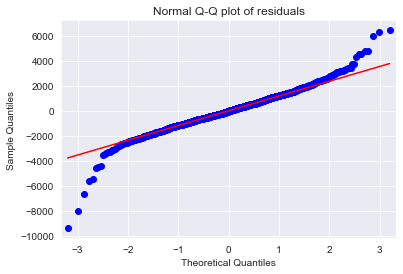

In [466]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonalline
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [467]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

## Residual Plot for Homoscedasticity

In [468]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

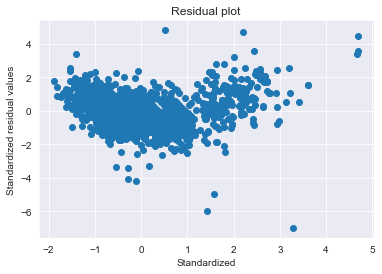

In [469]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized')
plt.ylabel('Standardized residual values')
plt.show()

## Residual vs Regresssors

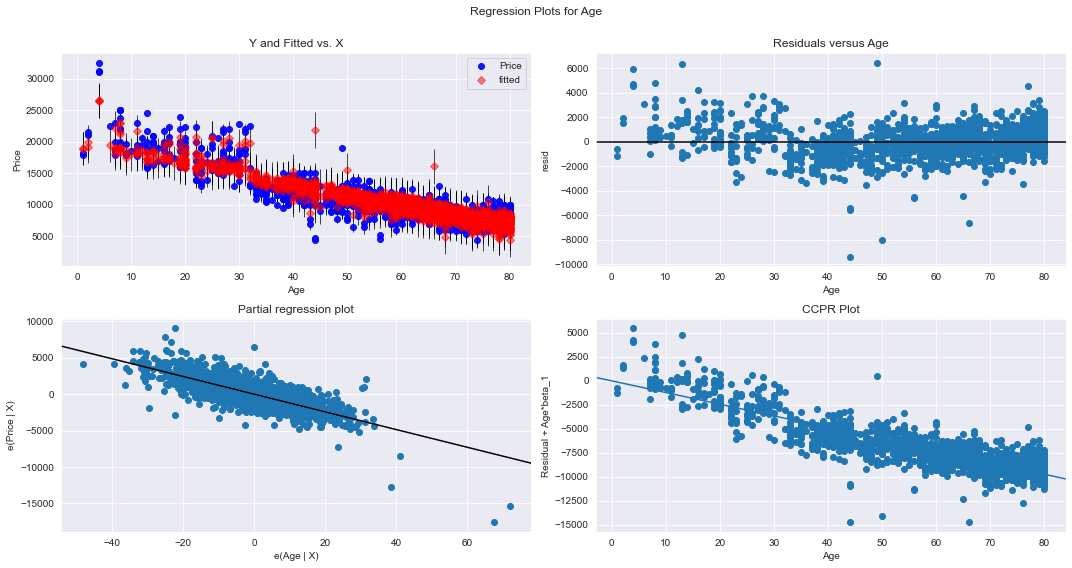

In [470]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

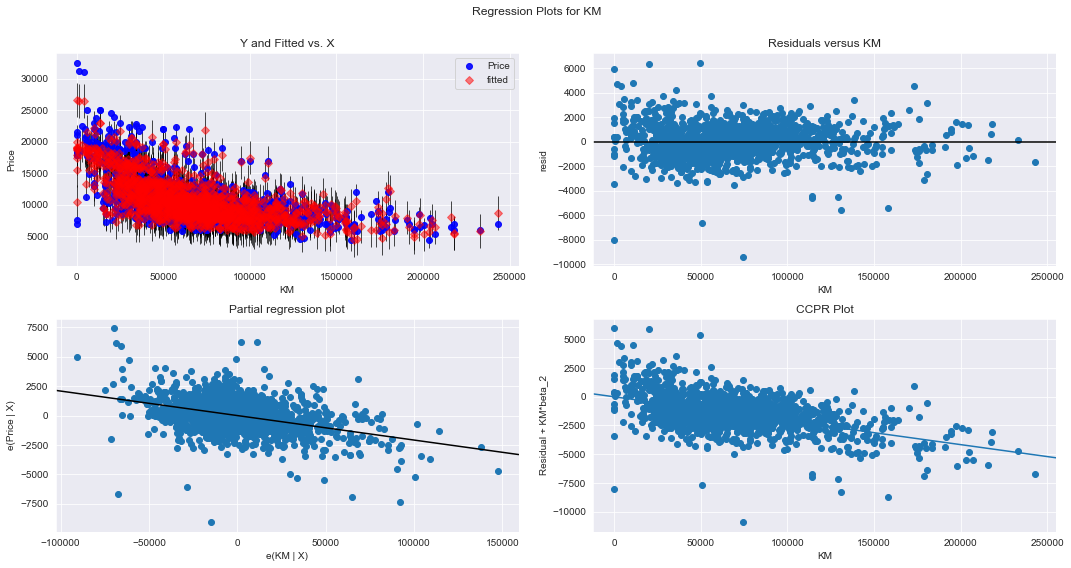

In [471]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

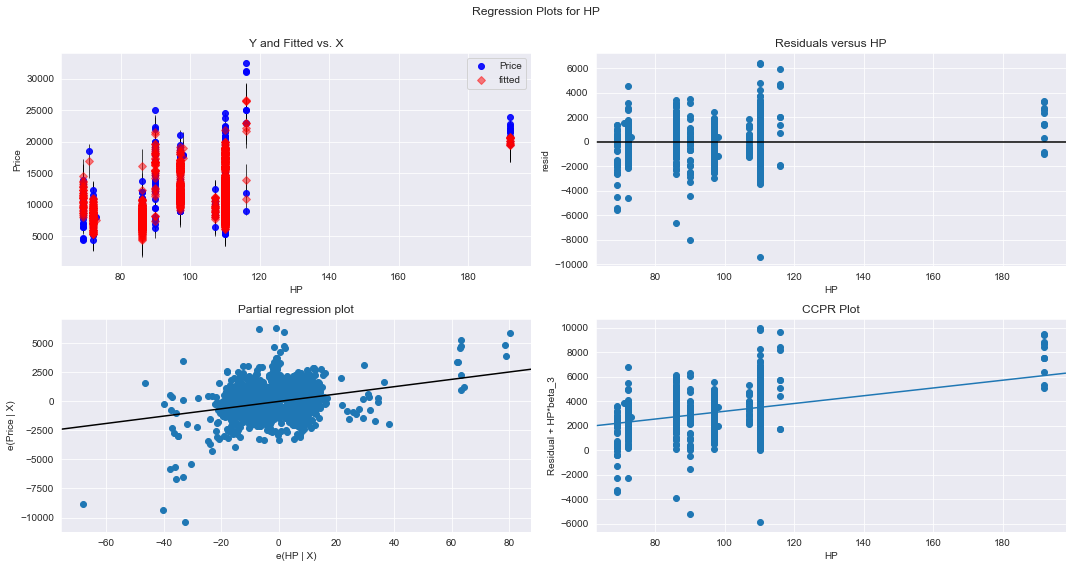

In [472]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

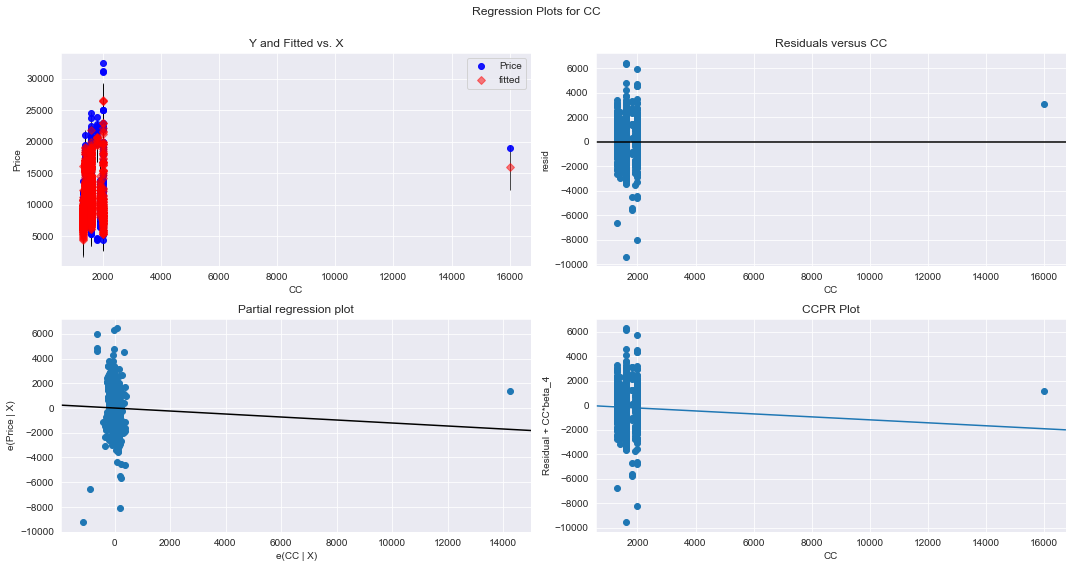

In [473]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

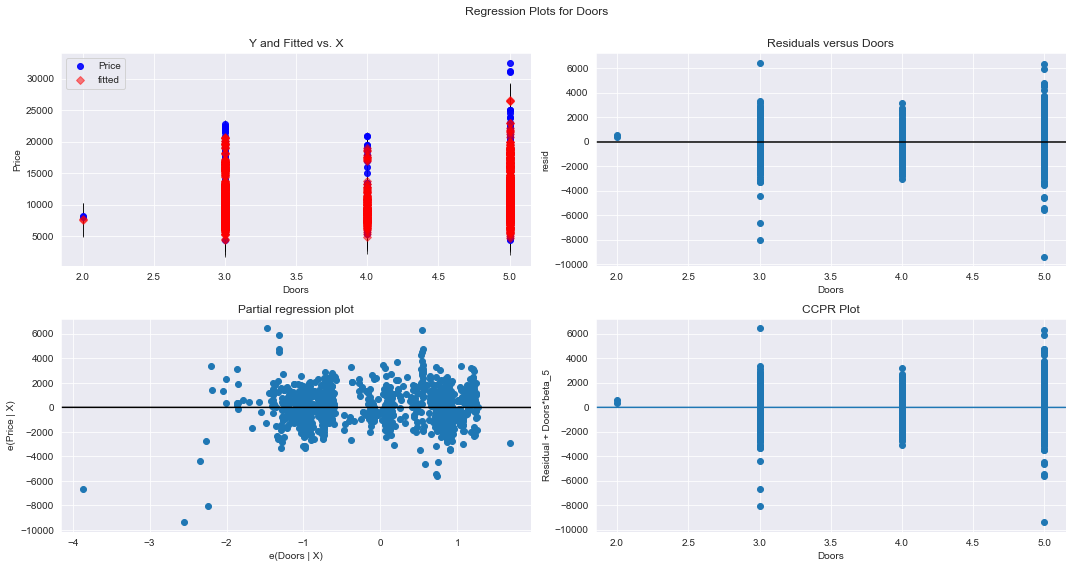

In [474]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

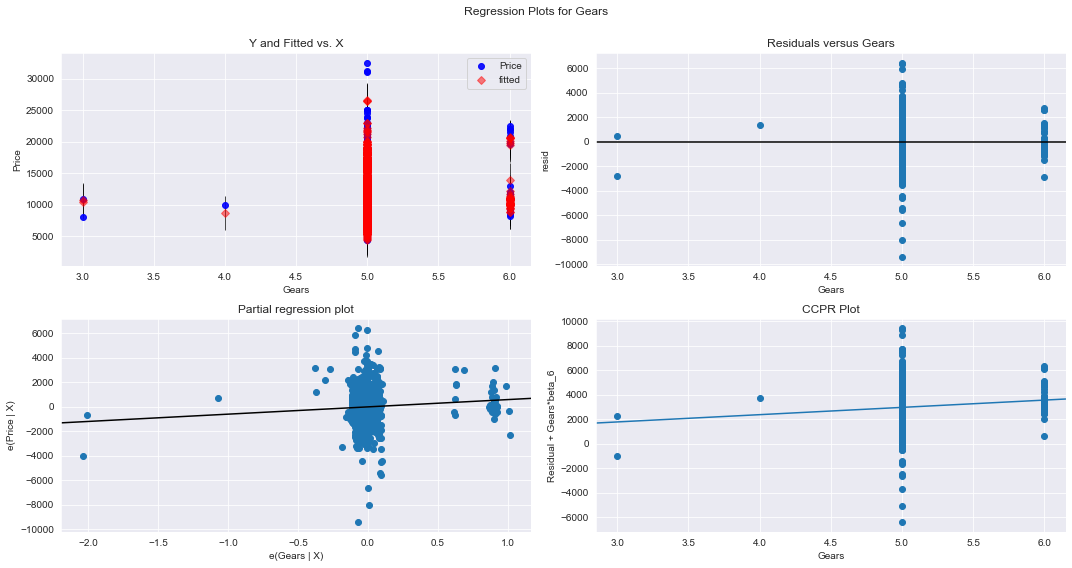

In [475]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

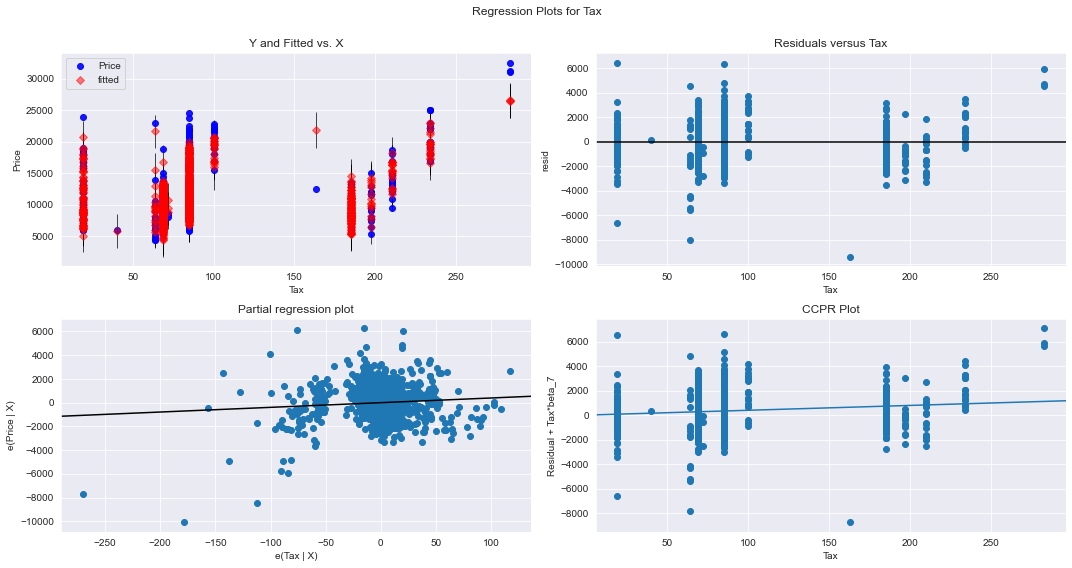

In [476]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Tax', fig=fig)
plt.show()

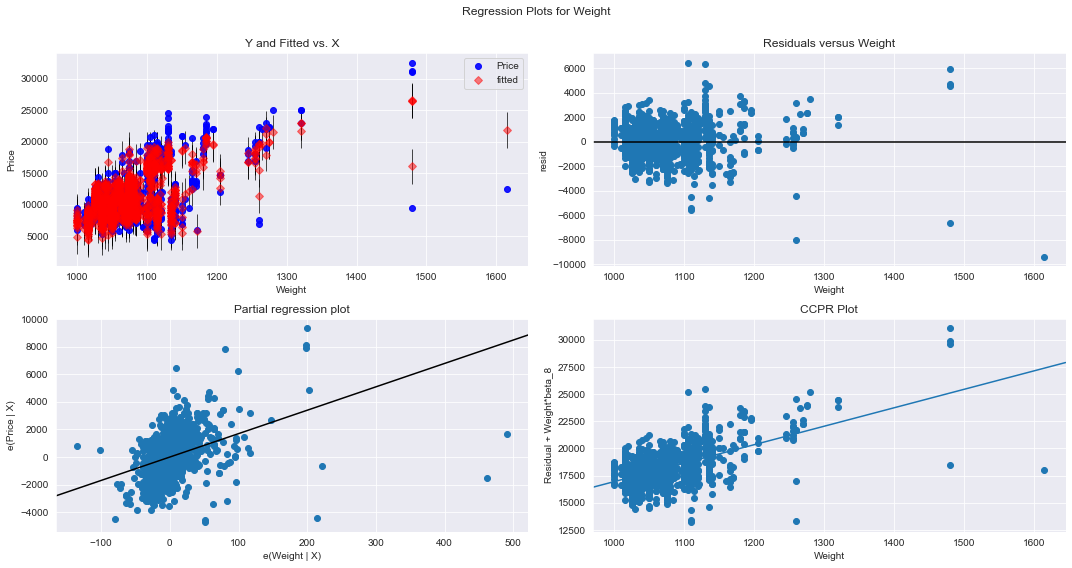

In [477]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting influencers/Outliers
 ## Cook's Distance

In [478]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

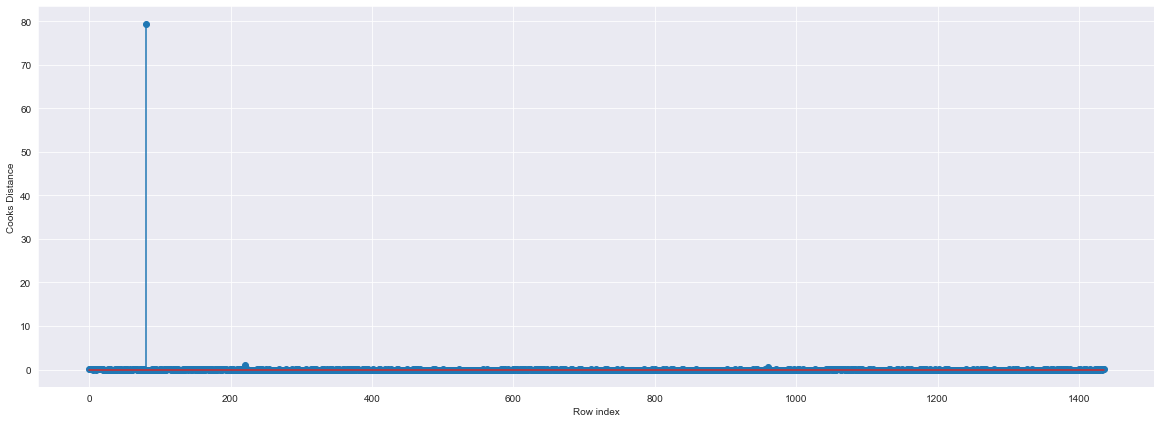

In [479]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [480]:
# Index and values of influencer where c is more than 0.5
(np.argmax(c), np.max(c))

(80, 79.52010624138055)

# High Influence points

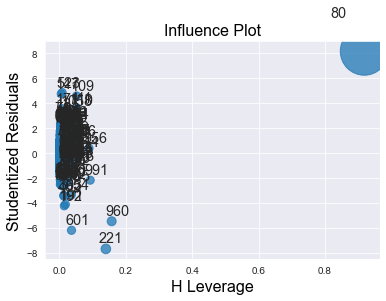

In [481]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [482]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [483]:
# from the above plot it is evident that data points 80,221 and 960 are the influencers

In [484]:
toyota[toyota.index.isin([80,221,960])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [485]:
toyota.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [486]:
# Load the data
toyota_new=pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/5 Multi Linear Regression/ToyotaCorolla - Copy.csv')

In [487]:
toyota_new = toyota_new.rename({'Age_08_04': 'Age'}, axis=1)
toyota_new = toyota_new.rename({'Quarterly_Tax': 'Tax'}, axis=1)
toyota_new = toyota_new.rename({'cc': 'CC'}, axis=1)

In [488]:
toyota_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [489]:
# disscard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota_new.drop(toyota.index[[80,221,960]],axis=0).reset_index()

In [490]:
# drop the original index
toyota1=toyota1.drop(['index'],axis=1)

In [491]:
toyota1

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [492]:
#excluding variable Doors
final_ml_CC = smf.ols('Price~Age+KM+HP+CC+Gears+Tax+Weight',data=toyota1).fit()

In [493]:
final_ml_CC.rsquared, final_ml_CC.aic

(0.8843226794628847, 24478.432455892536)

In [494]:
# Excluded variable CC
final_ml_Doors = smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Weight',data=toyota1).fit()

In [495]:
final_ml_Doors.rsquared, final_ml_Doors.aic

(0.872461841478004, 24618.309028810017)

# Comparing above R-squared and AIC values, model final_ml_CC which include all variable have the best r-squared and AIC values.

# Cook's Distance

In [496]:
model_influence_ml=final_ml_CC.get_influence()
(c_V,_)= model_influence_ml.cooks_distance

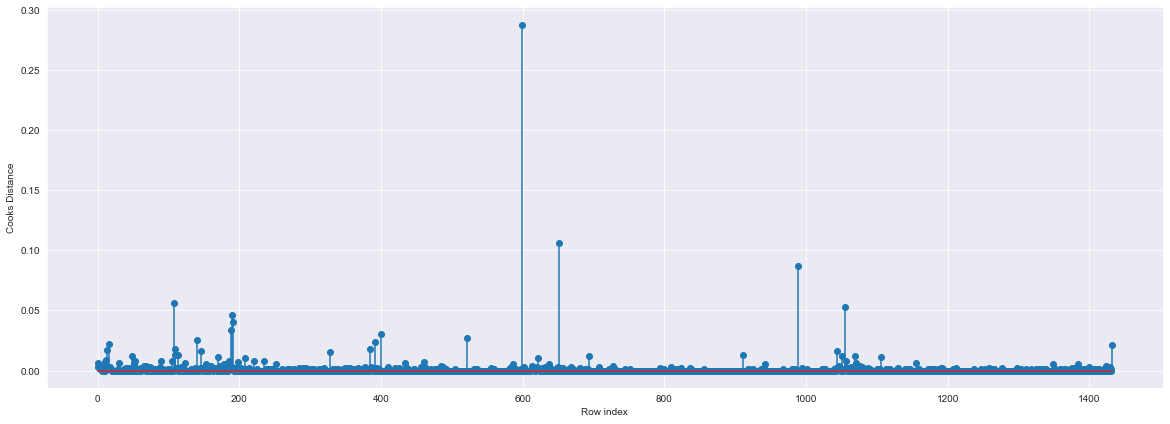

In [497]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [498]:
(np.argmax(c_V), np.max(c_V))

(599, 0.287722936389568)

### Since the value is <1, we can stop the diagnostic process and finalize the model

In [499]:
# final model is 
final_ml_CC = smf.ols('Price~Age+KM+HP+CC+Gears+Tax+Weight',data=toyota1).fit()

In [500]:
final_ml_CC.rsquared, final_ml_CC.aic

(0.8843226794628847, 24478.432455892536)

## Predicting for new data

In [501]:
# New data for prediction 
new_data = pd.DataFrame({'Age':23,'KM':46986,'HP':90,'CC':2000,
'Doors':3,'Gears':5,'Tax':210,'Weight':1165},index=[1])

In [502]:
final_ml_CC.predict(new_data)

1    16199.290708
dtype: float64

# Q2).   Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model.

In [503]:
data = pd.read_csv("C:/Users/DELL 5459/Downloads/excelr/Assignment/5 Multi Linear Regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [504]:
data.drop(['State'], inplace=True, axis=1)

In [505]:
data = data.rename({'R&D Spend': 'RD_S'}, axis=1)
data = data.rename({'Administration': 'Admin'}, axis=1)
data = data.rename({'Marketing Spend': 'M_S'}, axis=1)

In [506]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD_S    50 non-null     float64
 1   Admin   50 non-null     float64
 2   M_S     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [507]:
data.isna().sum()

RD_S      0
Admin     0
M_S       0
Profit    0
dtype: int64

In [508]:
data.loc[data.duplicated()]

,RD_S,Admin,M_S,Profit


In [509]:
data.describe()

,RD_S,Admin,M_S,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Matrix

In [510]:
data.corr()

,RD_S,Admin,M_S,Profit
RD_S,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
M_S,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

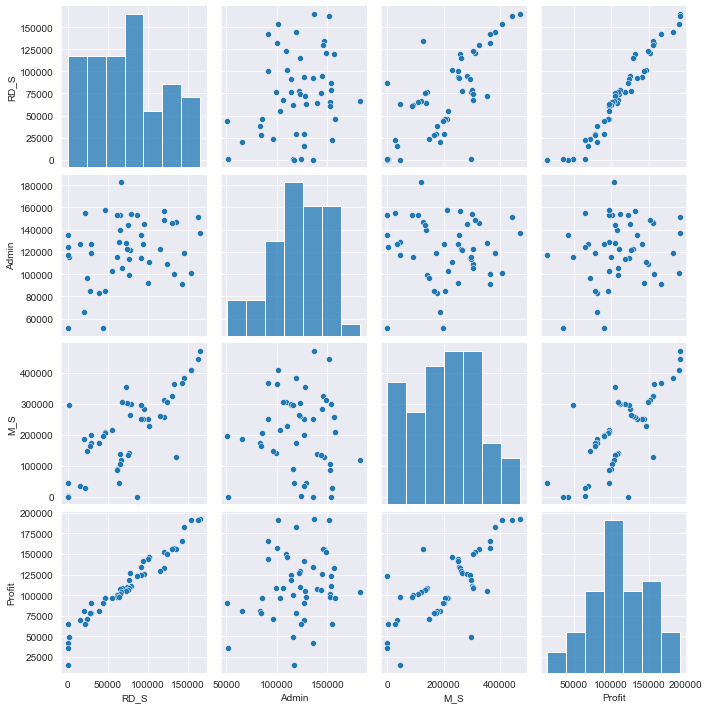

In [511]:
# Format the plot background and scatter plot for all the varibles
sns.set_style(style= 'darkgrid')
sns.pairplot(data)

# Preparing a model

# Model1: Statsmodel

In [512]:
# Build model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD_S+Admin+M_S', data=data).fit()

In [513]:
# Coefficients
model.params

Intercept    50122.192990
RD_S             0.805715
Admin           -0.026816
M_S              0.027228
dtype: float64

In [514]:
# t and p value
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD_S         17.846374
Admin        -0.525507
M_S           1.655077
dtype: float64 
 Intercept    1.057379e-09
RD_S         2.634968e-22
Admin        6.017551e-01
M_S          1.047168e-01
dtype: float64


In [515]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

As we can see that the p-values of "Admin" and "M_S" is greater that 0.05.
This means there is some collinearity problem or some data problem (like outliers).

## Simple Linear Regression Models

In [516]:
ml_A= smf.ols('Profit~Admin',data=data).fit()
# t and p-values
print(ml_A.tvalues, '\n', ml_A.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [517]:
ml_M_S= smf.ols('Profit~M_S',data=data).fit()
# t and p-values
print(ml_M_S.tvalues, '\n', ml_M_S.pvalues)

Intercept    7.808356
M_S          7.802657
dtype: float64 
 Intercept    4.294735e-10
M_S          4.381073e-10
dtype: float64


In [518]:
ml_A_M_S = smf.ols('Profit~Admin+M_S', data=data).fit()
# t and p-values
print(ml_A_M_S.tvalues, '\n', ml_A_M_S.pvalues)

Intercept    1.142741
Admin        2.467779
M_S          8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
M_S          9.727245e-11
dtype: float64


From the above simple linear Regression we find that their is some problem with "Admin".

## Calculating VIF

In [520]:
rsq_RD_S = smf.ols('RD_S~Admin+M_S', data=data).fit().rsquared
vif_RD_S = 1/(1-rsq_RD_S)

rsq_Admin = smf.ols('Admin~RD_S+M_S',data=data).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

rsq_M_S = smf.ols('M_S~RD_S+Admin',data=data).fit().rsquared
vif_M_S = 1/(1-rsq_M_S)

# Storing vif values in a data frame
d1={'variables':['RD_S','Admin','M_S'],'VIF':[vif_RD_S,vif_Admin,vif_M_S]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,RD_S,2.468903
1,Admin,1.175091
2,M_S,2.326773


# residual Analysis

# Test for Normality of Residuals (Q-Q plot)

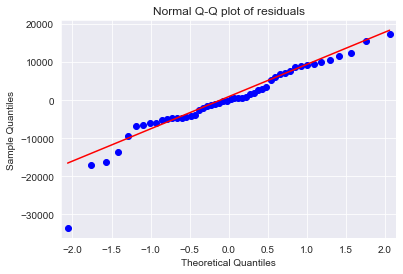

In [521]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [522]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [523]:
def get_standardized_values(vals):
    return(vals - vals.mean())/ vals.std()

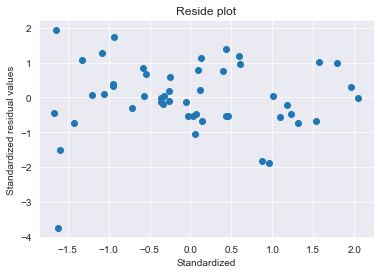

In [524]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Reside plot')
plt.xlabel('Standardized')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors


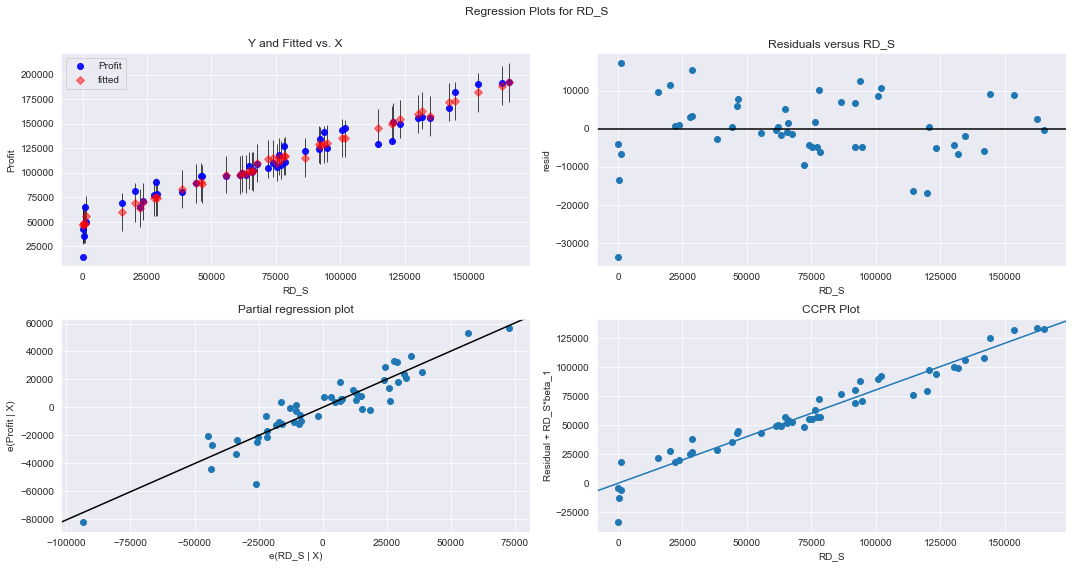

In [525]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'RD_S', fig=fig)
plt.show()

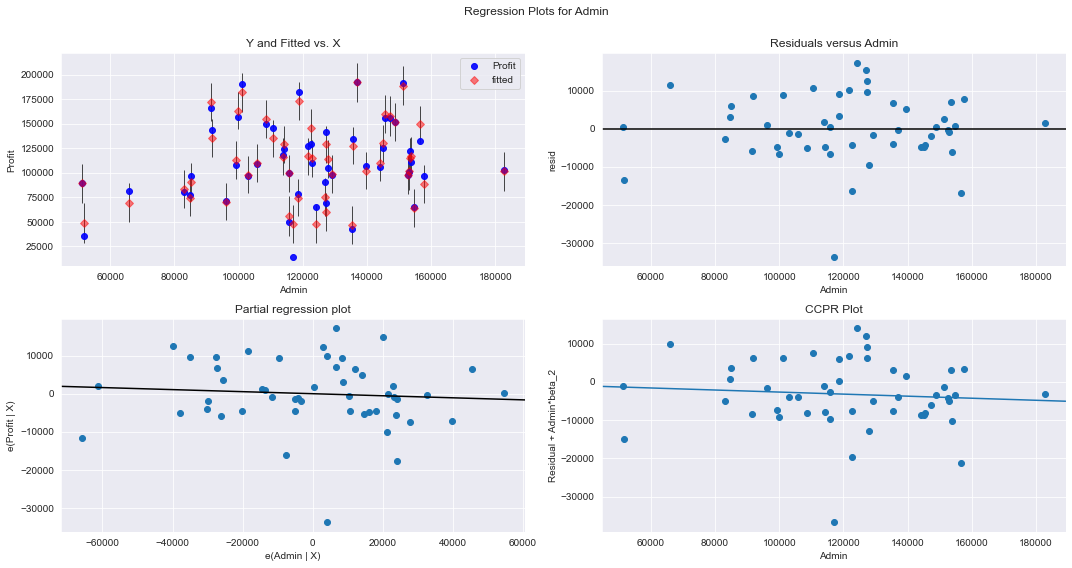

In [526]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Admin', fig=fig)
plt.show()

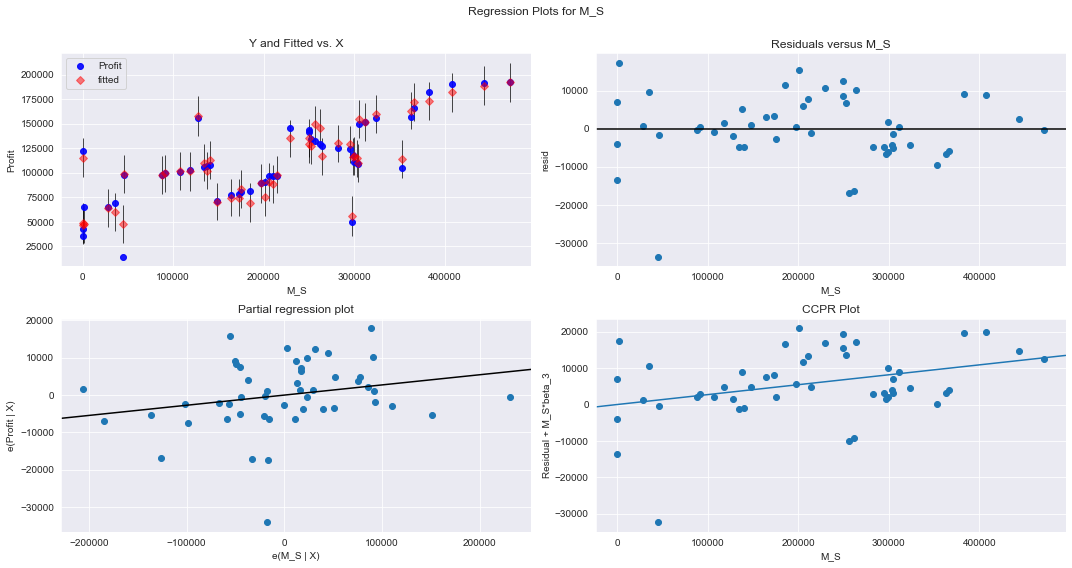

In [527]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'M_S', fig=fig)
plt.show()

# Model deletion diagnistics

## Detecting influencers/Outliers

## Cook's Distance

In [528]:
model_influence= model.get_influence()
(c,_) = model_influence.cooks_distance

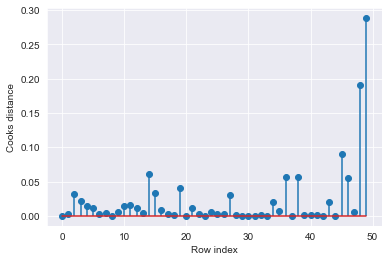

In [529]:
#Plot the influencers values using stem plot
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [530]:
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

# High influence points

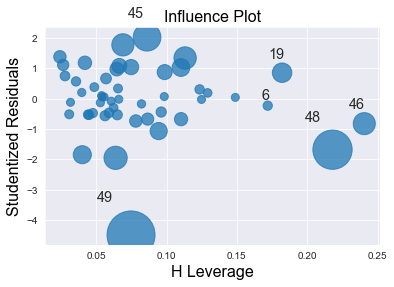

In [531]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [532]:
k= data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

From the above plots, it is evident that no data point is the influencer.

# Improving the model

From the above models we find that there is some problem with "Admin". 
So in the final model we will exclude variable "Admin".

# Build Model

In [533]:
# Exlude variable "Admin" and generate R-Squared value
model1= smf.ols('Profit~RD_S+M_S', data=data).fit()

In [534]:
model1.rsquared, final_ml.aic

(0.9504503015559763, 1057.070772191826)

## Predicting for new data

In [535]:
# New data for prediction 
new_data= pd.DataFrame({'RD_S':20000, 'M_S':10000}, index=[1])

In [536]:
final_ml.predict(new_data)

1    63206.623854
dtype: float64

In [537]:
print(final_ml)

In [538]:
final_ml.predict(data.iloc[0:5,])

0    192800.458625
1    189774.659480
2    181405.378097
3    173441.308842
4    171127.623218
dtype: float64

# Model2: Log transformation

In [539]:
model2 = smf.ols("Profit~np.log(RD_S)+np.log(M_S)", data=data).fit()

C:\Users\DELL 5459\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


LinAlgError: SVD did not converge

In [540]:
# Coefficients
model2.params

NameError: name 'model2' is not defined

In [541]:
# t and p-values
print(model2.tvalues, '\n', model2.pvalues)

NameError: name 'model2' is not defined

In [542]:
(model2.rsquared, model3.rsquared_adj)

NameError: name 'model2' is not defined

# Model 3- Sqrt transformation

In [545]:
model3 = smf.ols('Profit~np.sqrt(RD_S)+np.sqrt(M_S)',data= data).fit()

In [546]:
# Coefficients
model3.params

Intercept        18964.251993
np.sqrt(RD_S)      344.674569
np.sqrt(M_S)        15.734474
dtype: float64

In [547]:
# t and p-values
print(model3.tvalues,'\n', model3.pvalues)

Intercept         3.772359
np.sqrt(RD_S)    14.764415
np.sqrt(M_S)      1.102255
dtype: float64 
 Intercept        4.522514e-04
np.sqrt(RD_S)    2.835124e-19
np.sqrt(M_S)     2.759634e-01
dtype: float64


In [548]:
(model3.rsquared, model3.rsquared_adj)

(0.9074624902569638, 0.9035247238849197)

# Model 4: Sklearn Model

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
X=data[['RD_S','M_S']]
y=data.iloc[:,-1]

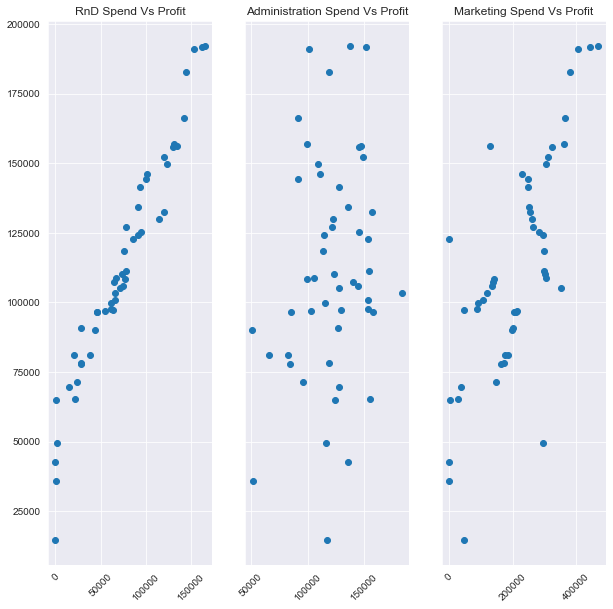

In [551]:
# Ploting all the three features together
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 10))

ax1.scatter(data["RD_S"], data.Profit)
ax1.set_title('RnD Spend Vs Profit')

ax2.scatter(data["Admin"], data.Profit)
ax2.set_title('Administration Spend Vs Profit')

ax3.scatter(data["M_S"], data.Profit)
ax3.set_title('Marketing Spend Vs Profit')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()

In [552]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

We can Infer that both R&D & Marketing fetures are related to Profit linearly. We can generate a multi regression model using these two.

In [553]:
from sklearn.linear_model import LinearRegression

In [554]:
regressor = LinearRegression() #Regression object created

## Traning the model

In [555]:
regressor.fit(X_train, y_train) #Training model

LinearRegression()

In [556]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.9544855917548343


# Predicting Data


In [557]:
y_pred = regressor.predict(X_test) # predicting

In [558]:
y_pred

array([103066.92650993, 134980.77031452, 135442.08287513,  73055.77302514,
       182480.8206228 , 114370.99086191,  67338.79085538,  98232.53852252,
       114571.23018341, 172068.27025499,  97021.48065448,  89009.06807808,
       111096.46809524,  89489.12418883, 128889.90886756, 161252.36179763,
       150951.30453297])

In [559]:
x_test_new = [[200000, 150000]]

In [560]:
regressor.predict(x_test_new)

array([213662.98587739])

## R square and predicted values for Model 1, Model 2, Model 3, Model 4

In [561]:
# initialize list of lists
df = [['Model1', 0.9504503015559763],['Model3', 0.9074624902569638],['Model4',0.9544855917548343]]

df1 = pd.DataFrame(data, columns = ['Model', 'R2_Square'])

In [562]:
# Storing vif values in a data frame
df={'MODELS':['Model1','Model3',],'VIF':[model1.rsquared,model3.rsquared,]}
Rsqr = pd.DataFrame(df)
Rsqr

,MODELS,VIF
0,Model1,0.950450
1,Model3,0.907462
